# Analisis preliminar del conjunto de datos

In [1]:
#Importaciones
import pandas as pd
import numpy as np

#Para llamar a archivos de otras carpetas
import sys
sys.path.append('..')

#importar la función reduce para pode rusarla
from functools import reduce

#Visualizar todas las columnas
pd.set_option('display.max_columns', None)


In [2]:
#Después importamos el archivo de funciones ('sp_limpieza.py') 
import src.sp_limpieza as sp
#Importamos importlib para poder recargar el módulo y reflejar los cambios actualizados
import importlib  
importlib.reload(sp) 

<module 'src.sp_limpieza' from 'c:\\Users\\pooo_\\Desktop\\Hackio\\proyecto_final_troncal\\analisis_eda_proyecto_final\\jupyters\\..\\src\\sp_limpieza.py'>

In [3]:
#Para interactuar con el sistema operativo
import os
#Devuelve la ruta del directorio actual
print(os.getcwd())

c:\Users\pooo_\Desktop\Hackio\proyecto_final_troncal\analisis_eda_proyecto_final\jupyters


In [4]:
#Librerías visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformación y limpieza de datos

### 1.1. Importación de los datos

In [5]:
#Leer los archivos
df_attendance = pd.read_csv("../data/data_raw/attendance.csv", index_col = 0)
df_homework = pd.read_csv("../data/data_raw/homework.csv", index_col = 0)
df_performance = pd.read_csv("../data/data_raw/performance.csv", index_col = 0)
df_students = pd.read_csv("../data/data_raw/students.csv", index_col = 0)
df_communication = pd.read_csv("../data/data_raw/communication.csv", index_col = 0)

### 1.2. Limpieza y transformación de los datos


In [6]:
#Ver dataframe 'df_attendace'
df_att_preliminar =  sp.eda_preliminar(df_attendance)

,Date,Subject,Attendance_Status
Student_ID,,,
S07502,2024-07-06,Geography,late
S04501,2024-05-26,English,late
S01326,2024-12-07,English,absnt
S07138,2024-04-14,English,excused
S10921,2024-12-03,Geography,excused


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 364680 entries, S06592 to S12134
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               364680 non-null  object
 1   Subject            364680 non-null  object
 2   Attendance_Status  364680 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB


None

____________________________
NULOS


Date                 0.0
Subject              0.0
Attendance_Status    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(347112)

____________________________
DESCRIBE


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
VALUE COUNTS
Date
2024-12-31    1075
2024-05-05    1073
2024-09-06    1070
2024-08-06    1068
2024-09-22    1068
              ... 
2024-12-25     922
2024-05-09     921
2024-03-31     919
2024-12-07     917
2024-04-21     905
Name: count, Length: 366, dtype: int64
Subject
Math         61241
Science      60881
Arabic       60749
English      60684
Geography    60640
History      60485
Name: count, dtype: int64
Attendance_Status
PRESENT       45982
Absent        45751
Present       45632
Late          45509
 late         45508
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64
____________________________


In [7]:
#Quitar los espacios y pasar a misnuculas las tabla
df_attendance = sp.valores_a_minus(df_attendance)
df_attendance.sample(10)

,date,subject,attendance_status
student_id,,,
s05970,2024-03-20,geography,excused
s03457,2024-06-13,science,present
s11674,2025-03-02,geography,late
s08273,2024-05-26,english,present
s04294,2024-09-12,arabic,absent
s04310,2024-08-20,history,absent
s00647,2024-06-19,history,present
s05994,2025-02-11,geography,absent
s00894,2024-07-21,english,left early


In [8]:
#Ver en la columna attendance_status que valores tiene.
conteo = df_attendance['attendance_status'].value_counts()
conteo

attendance_status
present       91614
late          91017
absent        45751
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64

In [9]:
#Corregimos el valor 'absnt' por 'absent' y comprobamos los resultados de la columna
df_attendance['attendance_status'] = df_attendance['attendance_status'].replace('absnt','absent')

conteo = df_attendance['attendance_status'].value_counts()
conteo
#Ya tenemos los valores de esta columna corregidos.

attendance_status
present       91614
absent        91229
late          91017
left early    45435
excused       45385
Name: count, dtype: int64

In [10]:
#Cambiar nombre de columna 'date' para hacerla mas descriptiva y 'attendace_status' para hacerla mas corta.
df_attendance.rename(columns={'date':'att_date', 'attendance_status':'att_status'}, inplace= True)

In [11]:
# Como la columna 'date' es de tipo 'Object' vamos a pasarla a tipo Datetime y comprobamos el tipo de dato que sea correct
df_attendance = sp.convertir_columna_a_fecha(df_attendance, 'att_date')
df_attendance.sample(10)

Columna 'att_date' convertida a datetime con formato %Y-%m-%d.


,att_date,subject,att_status
student_id,,,
s05779,2024-05-06,science,left early
s00038,2025-01-22,history,left early
s10921,2024-12-03,geography,excused
s09572,2024-03-23,english,late
s02851,2024-04-08,geography,left early
s04774,2025-02-03,english,present
s10569,2024-06-19,english,absent
s01623,2024-12-06,english,absent
s04742,2024-05-26,english,late


In [12]:
#Comprobación del tipo de dato de la columna
print(df_attendance['att_date'].dtype)

datetime64[ns]


In [13]:
#Comprobamos el resto de columnas que sean de tipo correcto.
print(df_attendance.dtypes)

att_date      datetime64[ns]
subject               object
att_status            object
dtype: object


In [14]:
#Ver dataframe 'df_homework'
df_hw_preliminar =  sp.eda_preliminar(df_homework)
df_hw_preliminar

,Subject,Assignment_Name,Due_Date,Status,Grade_Feedback,Guardian_Signature
Student_ID,,,,,,
S04084,English,Single score interesting.,2024-10-03,pending,D,
S01406,Math,Beautiful practice person.,2024-11-01,not done,C-,No
S11164,Math,Scientist shake.,2025-01-16,not done,F,
S02222,Math,Grow do.,2025-03-02,Done,B-,
S12119,Science,Painting public movement reach.,2024-11-18,✅,A,


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, S12002 to S08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             60780 non-null  object
 1   Assignment_Name     60780 non-null  object
 2   Due_Date            60780 non-null  object
 3   Status              60780 non-null  object
 4   Grade_Feedback      60780 non-null  object
 5   Guardian_Signature  60780 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


None

____________________________
NULOS


Subject               0.0
Assignment_Name       0.0
Due_Date              0.0
Status                0.0
Grade_Feedback        0.0
Guardian_Signature    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
VALUE COUNTS
Subject
English      10209
Geography    10179
Science      10112
History      10110
Arabic       10106
Math         10064
Name: count, dtype: int64
Assignment_Name
Also.                      15
Term.                      15
Understand.                13
Not.                       13
Eye.                       12
                           ..
Effect job amount.          1
Study indicate fight.       1
Reach whose investment.     1
Suggest figure.             1
Involve determine.          1
Name: count, Length: 56065, dtype: int64
Due_Date
2025-01-23    315
2025-03-02    302
2024-11-06    301
2024-11-08    300
2024-12-25    299
             ... 
11/04/2024     52
10/13/2024     51
12/21/2024     50
11/22/2024     50
03/01/2025     46
Name: count, Length: 366, dtype: int64
Status
 Done       10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64
Grade_Feedback
A+    7709
B-    7639

In [15]:
#Pasar dataframe a minusculas
df_homework = sp.valores_a_minus(df_homework)
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s09032,english,glass end.,11/08/2024,❌,c-,
s01725,geography,fear read.,2024-10-19,✔,f,
s10756,english,matter suggest.,09/09/2024,❌,c-,no
s10408,english,base hear machine.,2024-12-22,done,b-,
s07155,math,consider top kid.,2025-02-12,not done,a+,
s11791,english,go.,2024-12-07,done,a,no
s01511,arabic,recently form.,02/01/2025,pending,a+,no
s01669,arabic,hope song hundred.,2025-03-07,✔,a,no
s06793,english,also three skill.,2024-09-20,done,f,no


In [16]:
#La columna 'due_date' tiene valores de fecha con diferentes formatos.
# Hay que pasarlo a un formato y asignalo como de tipo datetime.

df_homework = sp.convertir_columna_a_fecha(df_homework, 'due_date')
df_homework.sample(10)

Columna 'due_date' convertida a datetime con formato %Y-%m-%d.


,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s04729,science,professional section off.,NaT,✅,f,no
s03522,history,others choice.,NaT,✅,a+,yes
s00963,science,really public.,2025-02-16,pending,a,no
s10061,arabic,suddenly every heart.,2024-11-29,pending,f,yes
s08650,arabic,himself affect.,2024-11-23,✅,d,
s06898,english,race great.,2024-09-12,❌,a+,yes
s10387,arabic,even course.,2024-12-22,❌,c-,
s11863,history,answer many.,2024-10-02,not done,c,yes
s00044,science,her suggest design system.,2024-11-26,✅,a,yes


In [17]:
#Comprobación del tipo de dato de la columna
print(df_homework['due_date'].dtype)

datetime64[ns]


In [18]:
#Sacar nulos de la columna 'due_date' mediante funcion de sp.limpieza.py
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject                   0
assignment_name           0
due_date              12358
status                    0
grade_feedback            0
guardian_signature        0
dtype: int64, subject                0.00
assignment_name        0.00
due_date              20.33
status                 0.00
grade_feedback         0.00
guardian_signature     0.00
dtype: float64)


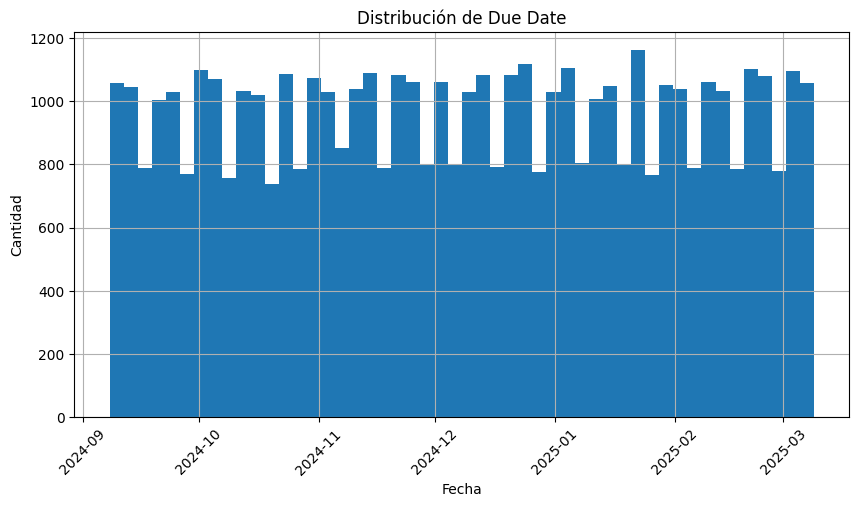

In [19]:
# La columna 'due_date' tiene una cantidad elevada de nulos (20.33%) por lo que antes de imputarla comprobamos
#como es la distribución de sus valores para poder así valorar si imputar los nulos, si por media, moda o mediana.

df_homework['due_date'].hist(bins=50, figsize=(10,5))
plt.title('Distribución de Due Date')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [20]:
#Comprobamos las estadísticas descriptivas de 'due_date'
print(df_homework['due_date'].describe())

count                            48422
mean     2024-12-08 09:02:43.710710016
min                2024-09-08 00:00:00
25%                2024-10-24 00:00:00
50%                2024-12-09 00:00:00
75%                2025-01-23 00:00:00
max                2025-03-09 00:00:00
Name: due_date, dtype: object


In [21]:
#Dado que las fechas están bastante centradas en torno a finales de 2024, lo más razonable sería:
# Imputar con la mediana (50%), que es 2024-12-09, ya que la mediana es robusta frente a outliers y nos va a evitar 
# en caso de haber un par de fechas raras que el resultado no se distorsione demasiado.

mediana_fecha = df_homework['due_date'].median()
df_homework['due_date'].fillna(mediana_fecha, inplace= True)


C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\3655258861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['due_date'].fillna(mediana_fecha, inplace= True)


In [22]:
#Comprobamos que los nulos han desaparecido
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject               0
assignment_name       0
due_date              0
status                0
grade_feedback        0
guardian_signature    0
dtype: int64, subject               0.0
assignment_name       0.0
due_date              0.0
status                0.0
grade_feedback        0.0
guardian_signature    0.0
dtype: float64)


In [23]:
#Para coregir la columna 'status' vamos a comprobar primero el tipo de valores que tiene.
status_valores = df_homework['status'].value_counts()
status_valores

status
done        10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64

In [24]:
#Vamos a homogeinizar esos valores. 
mapeo_status = {
    '✅':'done',
    '❌':'not done',
    '✔':'done',
    'pending':'pending',
    'done':'done',
    'not done':'not done',
}

df_homework['status'] = df_homework['status'].replace(mapeo_status)

status_valores = df_homework['status'].value_counts()
status_valores


status
done        30381
not done    20385
pending     10014
Name: count, dtype: int64

In [25]:
#Debemos comprobar la columna 'guardian_signatura' ya que tiene campos vacíos que pandas
# lo detecta como cadena de texto vacía.
valores = df_homework['guardian_signature'].value_counts()
print(valores)

guardian_signature
no     20372
yes    20348
       20060
Name: count, dtype: int64


In [26]:
#Debemos de convertir la cadena vacia por nulos de numpy. Después vamos a comprobar cuantos nulos son.
df_homework['guardian_signature'] = df_homework['guardian_signature'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_homework['guardian_signature'])
ver_nulos

(np.int64(20060), np.float64(33.0))

In [27]:
#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts(dropna=False, normalize=True)*100)

guardian_signature
no     33.517604
yes    33.478118
NaN    33.004278
Name: proportion, dtype: float64


In [28]:
#Hay un 33% de nulos de la columna 'guardian_signature' por tanto vamos a ver sus cuartiles, media etc.
print(df_homework['guardian_signature'].describe())

count     40720
unique        2
top          no
freq      20372
Name: guardian_signature, dtype: object


In [29]:
#Vamos a imputar los nulos con 'unknown' ya que así no modificamos artificialmente la proporción original y
# dejamos constancia de que falta esta información.

df_homework['guardian_signature'].fillna('unknown', inplace = True)

#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts())

guardian_signature
no         20372
yes        20348
unknown    20060
Name: count, dtype: int64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\2920811997.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['guardian_signature'].fillna('unknown', inplace = True)


In [30]:
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s08955,history,attention debate.,2024-12-15,done,c,no
s07983,science,same argue.,2024-09-23,not done,a+,unknown
s08204,math,though herself dinner.,2025-01-08,done,b-,unknown
s12100,math,fear.,2025-03-06,not done,b-,yes
s11547,arabic,day court.,2025-02-13,done,c-,unknown
s00404,history,hear star down.,2024-11-25,done,c,yes
s10812,arabic,prove human.,2024-11-12,done,b-,yes
s08679,arabic,ten trouble.,2024-10-07,done,c,yes
s06393,english,much true.,2025-02-19,pending,b-,no


In [31]:
#Ver dataframe 'df_communication'
df_comm_preliminar =  sp.eda_preliminar(df_communication)
df_comm_preliminar

,Date,Message_Type,Message_Content
Student_ID,,,
S10280,2024-11-26,Teacher to Parent,Focus argue generation each like her perhaps s...
S11432,2024-12-26,Automated Reminder,Environment me century also movement market ba...
S01411,2025-01-08,Parent to Teacher,To without country smile section subject shake...
S05035,2024-11-05,Parent to Teacher,Trial road source debate whole hair sea feelin...
S01799,2025-02-06,Teacher to Parent,Draw begin radio later article defense friend ...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 24312 entries, S01133 to S03501
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             24312 non-null  object
 1   Message_Type     24312 non-null  object
 2   Message_Content  24312 non-null  object
dtypes: object(3)
memory usage: 759.8+ KB


None

____________________________
NULOS


Date               0.0
Message_Type       0.0
Message_Content    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(737)

____________________________
DESCRIBE


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
VALUE COUNTS
Date
2025-02-18    164
2024-12-27    163
2025-03-02    163
2024-10-24    157
2024-10-06    156
             ... 
2024-09-20    110
2024-12-03    108
2024-10-10    108
2025-02-22    107
2024-11-21    103
Name: count, Length: 183, dtype: int64
Message_Type
Teacher to Parent     8149
Automated Reminder    8106
Parent to Teacher     8057
Name: count, dtype: int64
Message_Content
                                                                                                                                                            1227
Than far indeed gun doctor concern hear whose policy people board traditional.                                                                                 1
Than time unit nearly wrong man blue probably yes season civil car later both from those.                                                                      1
Around positive side your city top common pretty again agent.                                    

In [32]:
df_communication = sp.valores_a_minus(df_communication)
df_communication.sample(10)

,date,message_type,message_content
student_id,,,
s03036,2024-11-01,parent to teacher,rather space meeting left always pretty alone ...
s08054,2024-11-07,teacher to parent,difficult individual study until remember beli...
s03785,2024-11-11,automated reminder,adult character artist treat thus participant ...
s10959,2024-09-30,teacher to parent,see dream election american grow those order l...
s00050,2025-02-02,teacher to parent,arm however same month kitchen perhaps preside...
s09212,2024-10-17,teacher to parent,part down since wait poor church group various...
s05702,2024-12-21,automated reminder,name of picture test always accept rate indeed...
s07032,2024-09-27,teacher to parent,inside fund another professor challenge month ...
s03010,2025-03-04,teacher to parent,have raise this mrs dream above approach buy m...


In [33]:
#Cambiar el nombre de date a uno mas descriptivo y convertirlo a tipo datetime
df_communication.rename(columns={'date':'date_message'}, inplace=True)

df_communication = sp.convertir_columna_a_fecha(df_communication, 'date_message')
df_communication.sample(10)

Columna 'date_message' convertida a datetime con formato %Y-%m-%d.


,date_message,message_type,message_content
student_id,,,
s06190,2024-10-26,parent to teacher,develop include other consider fire now they u...
s04766,2024-12-20,parent to teacher,reveal score step remain hit approach characte...
s08915,2024-10-19,parent to teacher,letter new wonder audience herself level envir...
s10866,2024-11-11,teacher to parent,beyond history father change sound course hour...
s02816,2024-09-29,parent to teacher,next protect whatever style several provide tu...
s12003,2024-12-29,automated reminder,either economic system whatever consumer two a...
s00217,2024-12-22,teacher to parent,others current prove spend base during financi...
s07289,2024-11-05,automated reminder,yes new indeed feel heavy simple whatever scho...
s08011,2024-11-12,automated reminder,book impact image century election ground styl...


In [34]:
#Comprobación del tipo de dato de la columna
print(df_communication['date_message'].dtype)

datetime64[ns]


In [35]:
#Comprobar los valores que hay en la columna 'date_message'
print(df_communication['message_type'].value_counts())

message_type
teacher to parent     8149
automated reminder    8106
parent to teacher     8057
Name: count, dtype: int64


In [36]:
#Viendo la columna 'message_content' a través de la funcion eda_preliminar parece que hay campos vacíos (cadenas de texto vacías)
# que no figuran como nulos.

df_communication['message_content'] = df_communication['message_content'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_communication['message_content'])
ver_nulos

(np.int64(1227), np.float64(5.05))

In [37]:
#Eliminamos los nulos de 'message_content' ya que son escasos y buscamos tener el  dataframe lo más limpio posible.
df_communication = df_communication.dropna(subset=['message_content'])

In [38]:
df_prfm_preliminar = sp.eda_preliminar(df_performance)
df_prfm_preliminar

,Subject,Exam_Score,Homework_Completion_%,Teacher_Comments
Student_ID,,,,
S07340,English,82,90,Class can skill hotel play usually sure office...
S11192,Arabic,89,-5,Record contain fact say today generation devel...
S10666,Arabic,49,-5,And after for exist time son shoulder pattern ...
S06977,Arabic,62,100%,Ask view assume focus respond something sense ...
S06181,Arabic,41,80%,Law conference pass pattern sort play gun help...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 36468 entries, S00396 to S09604
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Subject                36468 non-null  object
 1   Exam_Score             36468 non-null  int64 
 2   Homework_Completion_%  36468 non-null  object
 3   Teacher_Comments       36468 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


None

____________________________
NULOS


Subject                  0.0
Exam_Score               0.0
Homework_Completion_%    0.0
Teacher_Comments         0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(1858)

____________________________
DESCRIBE


,count,mean,std,min,25%,50%,75%,max
Exam_Score,36468.0,74.964243,20.538704,40.0,57.0,75.0,93.0,110.0


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,36468,6,Arabic,6224
Homework_Completion_%,36468,5,95,7453
Teacher_Comments,36468,32918,,3551


____________________________
VALUE COUNTS
Subject
Arabic       6224
Science      6093
Geography    6082
English      6043
Math         6035
History      5991
Name: count, dtype: int64
Homework_Completion_%
95      7453
-5      7376
100%    7296
80%     7283
90      7060
Name: count, dtype: int64
Teacher_Comments
                                                                             3551
Including describe event yet middle assume rest any pick whatever oil.          1
Set factor safe fine fast population including.                                 1
Between current hotel west recognize believe hand on poor ball wonder.          1
Probably specific science memory her stand since main.                          1
                                                                             ... 
Environmental newspaper close story space season detail.                        1
Music tend or occur know development see.                                       1
Car the choice college consume

In [39]:
df_performance = sp.valores_a_minus(df_performance)
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s05350,history,88,90,song probably ability perform suffer situation...
s12070,geography,107,-5,
s06703,english,50,80%,discover protect model fine research look effort.
s03075,geography,64,95,company support because spend stop economic cu...
s11203,geography,58,90,result war stuff international film military f...
s09852,math,102,100%,process laugh similar entire public benefit he...
s03072,geography,43,95,what each remain player form series this.
s04305,geography,66,95,case today since according former i nothing wi...
s01406,geography,77,80%,yard husband we alone skin finish yeah.


In [40]:
#Sabiendo que las notas deben ser entre 0-100, aquellas inferiores a 0 y superiores a 100 van a ser outliers, tenemos que identificarlos 
#y saber cuantos son en porcentaje. 

#Filas de la columna
total_filas = df_performance.shape[0]

#Outliers inferioes
outliers_inf = df_performance[df_performance['exam_score'] < 0]
outliers_inf_num = outliers_inf.shape[0]
outiersl_inf_porcentaje = round(outliers_inf_num / total_filas * 100, 2)

#Outliers superiores
outliers_sup = df_performance[df_performance['exam_score'] > 100]
outliers_sup_num = outliers_sup.shape[0]
outliers_sup_porcentaje = round(outliers_sup_num / total_filas * 100, 2)

#Mostramos los resultados
print(f"Outliers inferiores (<0):{outliers_inf_num}, que corresponden al {outiersl_inf_porcentaje} de los datos")
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers inferiores (<0):0, que corresponden al 0.0 de los datos
Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [41]:
#Dado que las notas deben oscilar entre 0 y 100 como mínimo y máximo esos outliers que representan un 14.09% de los datos,
#no vamos a eliminarlos ya que en este análisis vamos a tener en cuenta el rendimiento en los exámenes. Por eso, los outliers vamos
#a reescalarlos al máximo permitido, asumiendo que han sido errores del dataset original. 

df_performance.loc[df_performance['exam_score'] > 100, 'exam_score'] = 100

In [42]:
#Comprobamos que ya no hay outliers
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [43]:
def limpiar_homework_completion(x):
    """
    Limpia y convierte los valores de 'homework_completion_%' a números. Elimina el '%' de las cadenas y convierte a `float`. 
    Los valores negativos se convierten en 0 y los mayores a 100 se ajustan a 100.

    Parámetros:
    x (str, int, float): Valor a limpiar y convertir.

    Devuelve:
    float: Valor entre 0 y 100, o None si hay un error.
    """
    try:
        if isinstance(x, str) and '%' in x:
            x = float(x.replace('%', '').strip())
        elif isinstance(x, str):
            x = float(x.strip())
        elif isinstance(x, (int, float)):
            x = float(x)
        else:
            return None
        
        if x < 0:
            x = 0
        elif x > 100:
            x = 100
        return x
    except:
        return None

# Verificamos primero existencia de la columna antes de limpiar
if 'homework_completion_%' in df_performance.columns:
    # Limpiamos la columna 'homework_completion_%' directamente 
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(limpiar_homework_completion)
    # Convertimos los valores a formato porcentaje
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(lambda x: f"{round(x)}%" if x is not None else None)
    print("Columna 'homework_completion_%' limpiada correctamente.")
else:
    print("La columna 'homework_completion_%' no existe en df_performance.")


Columna 'homework_completion_%' limpiada correctamente.


In [44]:
#Comprobamos que los valores de la columna 'homework_completion_%' sean consistentes
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s03734,english,93,100%,property staff mention class box seek.
s11921,math,96,95%,
s06213,arabic,97,90%,
s02455,english,88,90%,cultural recent moment produce station six pas...
s08427,english,77,100%,water every five take only letter.
s05771,arabic,74,0%,
s11500,science,88,95%,catch special thank simple artist person pm by...
s03902,science,79,95%,just free still toward evening maybe.
s05249,math,70,90%,


In [45]:
#Los campos vacíos de la columna 'teacher_comments' pasarlos a nulos para saber cuantos hay.np
df_performance['teacher_comments'] = df_performance['teacher_comments'].replace('', np.nan)

# Contar valores nulos en la columna 'teacher_comments'
nulos = sp.nulos_num_porcentaje(df_performance['teacher_comments'])
nulos

(np.int64(3551), np.float64(9.74))

In [46]:
#Imputar las filas que tienen nulos (un 9.74%) ya que no queremos
# perder el resto de información de esas filas.

df_performance['teacher_comments'] = df_performance['teacher_comments'].fillna('No comment')

df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s09627,math,94,0%,page performance ten then nothing candidate gr...
s02677,geography,100,0%,specific right pretty general easy carry reach...
s04790,science,89,0%,couple majority decision development second fo...
s04056,english,61,90%,audience between theory few action pull.
s06523,arabic,44,100%,work in summer arm produce song.
s11340,english,94,0%,size billion require mr skin ability phone its...
s10031,arabic,98,80%,No comment
s08242,science,100,100%,No comment
s06473,science,96,95%,should nothing federal arrive subject see.


In [47]:
df_std_preliminar = sp.eda_preliminar(df_students)
df_std_preliminar

,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact
Student_ID,,,,
S07915,david manning,2011-03-08,Grade 5,450-399-3339
S10641,Roger Hunter,2015-09-20,Grade 5,+1-920-533-2153x87106
S01268,Anthony Barrett,2015-05-04,Grade 2,(791)353-9421x22748
S02985,jenny morris,2010-12-23,Grade 3,276-650-5159
S00924,Kenneth Lambert,2017-10-18,Grade 5,550.724.6649


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 12156 entries, S00001 to S12156
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full_Name          12156 non-null  object
 1   Date_of_Birth      12156 non-null  object
 2   Grade_Level        12156 non-null  object
 3   Emergency_Contact  11538 non-null  object
dtypes: object(4)
memory usage: 474.8+ KB


None

____________________________
NULOS


Full_Name            0.00
Date_of_Birth        0.00
Grade_Level          0.00
Emergency_Contact    5.08
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
VALUE COUNTS
Full_Name
Michael Smith     6
Michael Lewis     5
Michelle Smith    5
Angela Harris     5
James Smith       4
                 ..
Beth Stephens     1
Ryan Robinson     1
Juan Mccoy        1
Denise Patton     1
Keith Wood        1
Name: count, Length: 11442, dtype: int64
Date_of_Birth
2013-11-29    10
2011-06-10     9
2017-04-17     9
2011-06-04     9
2006-03-11     8
              ..
2008-09-21     1
2018-01-10     1
2010-11-12     1
2010-08-30     1
2015-07-29     1
Name: count, Length: 5350, dtype: int64
Grade_Level
Grade 5    2472
Grade 4    2454
Grade 3    2447
Grade 2    2400
Grade 1    2383
Name: count, dtype: int64
Emergency_Contact
3793041001              1
781-534-4258x9046       1
(635)437-6131           1
(270)269-1173x5503      1
625.766.1101            1
                       ..
706.708.0421x412        1
+1-933-864-5644x501     1
+1-794-484-8495x7772    1
306-771-1524x116        1
308.517.3750            1
Name: count, Length: 115

In [48]:
df_students = sp.valores_a_minus(df_students)
df_students.sample(10)

,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s07037,jason hooper md,2015-06-28,grade 1,(352)497-8800x4809
s04285,robert zimmerman,2018-12-15,grade 5,858.689.8812
s02213,janice lee,03-27-2008,grade 1,+1-448-883-0442x48878
s06957,michelle keith,07-13-2013,grade 4,(411)268-0662
s07540,carl nelson,2009-06-24,grade 5,624-520-1015x707
s01625,matthew lane,2006-10-27,grade 3,(332)858-8421x8500
s00988,tina lee,2010-04-02,grade 1,+1-965-928-2399
s07593,stephanie brown,2010-07-08,grade 2,5357596825
s08957,ryan smith,08-30-2008,grade 2,NaN


In [49]:
#Pasar la columna date_of_birth al formato correcto
df_students = sp.convertir_columna_a_fecha(df_students,'date_of_birth')
df_students.sample(10)

Columna 'date_of_birth' convertida a datetime con formato %Y-%m-%d.


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s03631,steven williams,2008-03-27,grade 2,+1-434-448-7044x9000
s00949,karen lynch,2008-03-16,grade 2,+1-460-495-3827x284
s10024,kimberly rowe,2016-09-25,grade 5,417-693-0536
s07023,earl rose,2007-12-15,grade 4,(679)904-8608x56332
s10673,kimberly casey,2014-09-29,grade 1,456.627.7765
s09078,eric kelly,2010-05-31,grade 4,001-551-441-4125x114
s03586,emily terry,2010-01-11,grade 2,5857988028
s10240,kenneth lewis,NaT,grade 5,(795)243-5810
s01585,elizabeth wells,2014-02-18,grade 4,7879149571


In [50]:
#Comprobar los valores nulos de 'date_of_birth'
nulos = sp.nulos_num_porcentaje(df_students['date_of_birth'])
nulos

(np.int64(1205), np.float64(9.91))

In [51]:
#Eliminar los nulos de 'date_of_birth' de los estudiantes porque no es un dato relevante este dato demográfico para el analisis.
#Estamos analizando las notas, asistencias y productividad de los estudiantes.
df_students = df_students.dropna(subset=['date_of_birth'])

In [52]:
#Pasar la columna 'grade' a numerica. 

df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)
df_students.sample(5)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\1318979116.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s04352,timothy hanson,2006-06-22,2,965-407-5032x0697
s05506,brandy little,2006-12-11,5,(943)531-7066x64911
s03829,jennifer brown,2015-09-12,1,(643)703-0916x716
s03866,ivan gibson,2008-12-11,1,(274)605-3733
s10336,brandon smith,2016-09-09,4,3388810748


In [53]:
#Contar los nulos de emergency_contact y valor que hacer con ellos.
nulos_emergency_contact =sp.nulos_num_porcentaje(df_students['emergency_contact'])
nulos_emergency_contact

(np.int64(558), np.float64(5.1))

In [54]:
#Eliminamos estos nulos porque no son relevantes y queremos filas lo más completaas posibles.
df_students = df_students.dropna(subset=['emergency_contact'])

# 2. Análisis descriptivo de los datos

### 2.1. Resumen estadístico 

In [55]:
#Ver estadísticas df_attendance
att_stats = sp.obtener_estadisticas(df_attendance)
att_stats

Estadísticas Numéricas                                 \
                            count                           mean   
att_date                   364680  2024-09-07 11:13:51.352418560   
subject                       NaN                            NaN   
att_status                    NaN                            NaN   

                                                                           \
                            min                  25%                  50%   
att_date    2024-03-09 00:00:00  2024-06-08 00:00:00  2024-09-07 00:00:00   
subject                     NaN                  NaN                  NaN   
att_status                  NaN                  NaN                  NaN   

                                                     Estadísticas Categóricas  \
                            75%                  max                    count   
att_date    2024-12-08 00:00:00  2025-03-09 00:00:00                      NaN   
subject                     NaN                  NaN                   364680   
att_status                  NaN                  NaN                   364680   

                                   
           unique      top   freq  
att_date      NaN      NaN    NaN  
subject         6     math  61241  
att_status      5  present  91614

In [56]:
#Ver estadísticas df_homework
hmw_stats = sp.obtener_estadisticas(df_homework)
hmw_stats

Estadísticas Numéricas                                 \
                                    count                           mean   
due_date                            60780  2024-12-08 12:05:09.891411968   
subject                               NaN                            NaN   
assignment_name                       NaN                            NaN   
status                                NaN                            NaN   
grade_feedback                        NaN                            NaN   
guardian_signature                    NaN                            NaN   

                                                              \
                                    min                  25%   
due_date            2024-09-08 00:00:00  2024-11-05 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                                              \
                                    50%                  75%   
due_date            2024-12-09 00:00:00  2025-01-11 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                        Estadísticas Categóricas         \
                                    max                    count unique   
due_date            2025-03-09 00:00:00                      NaN    NaN   
subject                             NaN                    60780      6   
assignment_name                     NaN                    60780  56065   
status                              NaN                    60780      3   
grade_feedback                      NaN                    60780      8   
guardian_signature                  NaN                    60780      3   

                                    
                        top   freq  
due_date                NaN    NaN  
subject             english  10209  
assignment_name       also.     15  
status                 done  30381  
grade_feedback           a+   7709  
guardian_signature       no  20372

In [57]:
perf_stats = sp.obtener_estadisticas(df_performance)
perf_stats

Estadísticas Numéricas                                  \
                                       count       mean      std   min   25%   
exam_score                           36468.0  74.189454  19.4164  40.0  57.0   
subject                                  NaN        NaN      NaN   NaN   NaN   
homework_completion_%                    NaN        NaN      NaN   NaN   NaN   
teacher_comments                         NaN        NaN      NaN   NaN   NaN   

                                         Estadísticas Categóricas         \
                        50%   75%    max                    count unique   
exam_score             75.0  93.0  100.0                      NaN    NaN   
subject                 NaN   NaN    NaN                    36468      6   
homework_completion_%   NaN   NaN    NaN                    36468      5   
teacher_comments        NaN   NaN    NaN                    36468  32918   

                                         
                              top  freq  
exam_score                    NaN   NaN  
subject                    arabic  6224  
homework_completion_%         95%  7453  
teacher_comments       No comment  3551

In [58]:
#Ver estadísticas df_communication 
comm_stats = sp.obtener_estadisticas(df_communication)
comm_stats

Estadísticas Numéricas                                 \
                                 count                           mean   
date_message                     23085  2024-12-08 10:02:41.871345408   
message_type                       NaN                            NaN   
message_content                    NaN                            NaN   

                                                           \
                                 min                  25%   
date_message     2024-09-08 00:00:00  2024-10-24 00:00:00   
message_type                     NaN                  NaN   
message_content                  NaN                  NaN   

                                                           \
                                 50%                  75%   
date_message     2024-12-09 00:00:00  2025-01-23 00:00:00   
message_type                     NaN                  NaN   
message_content                  NaN                  NaN   

                                     Estadísticas Categóricas         \
                                 max                    count unique   
date_message     2025-03-09 00:00:00                      NaN    NaN   
message_type                     NaN                    23085      3   
message_content                  NaN                    23085  23085   

                                                                          
                                                               top  freq  
date_message                                                   NaN   NaN  
message_type                                     teacher to parent  7754  
message_content  baby price expert certain forget ball bar prod...     1

In [59]:
#Ver estadísticas df_students
std_stats = sp.obtener_estadisticas(df_students)
std_stats

Estadísticas Numéricas                                 \
                                   count                           mean   
date_of_birth                      10393  2012-08-23 23:14:41.554892544   
grade_level                      10393.0                       3.019821   
full_name                            NaN                            NaN   
emergency_contact                    NaN                            NaN   

                                                             \
                                   min                  25%   
date_of_birth      2006-03-11 00:00:00  2009-06-08 00:00:00   
grade_level                        1.0                  2.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                             \
                                   50%                  75%   
date_of_birth      2012-08-25 00:00:00  2015-11-15 00:00:00   
grade_level                        3.0                  4.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                 Estadísticas Categóricas  \
                                   max       std                    count   
date_of_birth      2019-03-09 00:00:00       NaN                      NaN   
grade_level                        5.0  1.410736                      NaN   
full_name                          NaN       NaN                    10393   
emergency_contact                  NaN       NaN                    10393   

                                              
                  unique            top freq  
date_of_birth        NaN            NaN  NaN  
grade_level          NaN            NaN  NaN  
full_name           9757  michael smith    6  
emergency_contact  10393     3793041001    1

# 3. Visualización de los datos.

In [60]:
#Analizamos los dataframes por separado y uniendo algunos para sacar visualziaciones relevantes. No hacemos un merge general de todos los dataframes a la vez
# porque se generan una cantidad muy elevada de NaN.

In [61]:
#Como vamos a necesitar resetear los índices de algunos dataframes para que 'student_id' salga como columna,
#lo vamos a hacer con el resto de dataframes para que todos estén igual y no haya problemas en Power BI.
df_attendance = df_attendance.reset_index()
df_homework = df_homework.reset_index()
df_performance = df_performance.reset_index()
df_communication = df_communication.reset_index()
df_students = df_students.reset_index()

In [62]:
#🟢🟢Datos de asistencia.
#Ver cual es el promedio de asistencia general.
# Crear una columna numérica para mapear el estado de asistencia
df_attendance['att_numeric'] = df_attendance['att_status'].map({
    'present': 1,
    'late': 1,
    'left early': 1,
    'absent': 0,
    'excused': 0
})

#Calcular la tasa de asistencia general
attendance_rate = df_attendance['att_numeric'].mean()*100
print(f"El promedio de la asistencia general es {attendance_rate:.2f}%")

El promedio de la asistencia general es 62.54%


C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\323849077.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=att_by_grade, x='grade_level', y='att_numeric', palette='viridis')


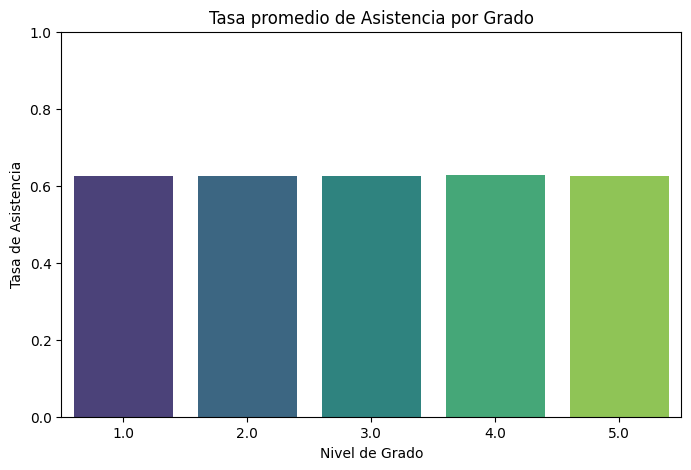

,grade_level,att_numeric
0,1.0,0.624040
1,2.0,0.625063
2,3.0,0.626308
3,4.0,0.627256
4,5.0,0.625458


In [ ]:
#Ver la tasa de asistencia por grado.
#Unimos el df_attendande con df_students para poder tener la información de la columna 'grade_level'.
df_att_grade = pd.merge(df_attendance, df_students[['student_id', 'grade_level']], on='student_id', how='left')

# Agrupar por 'grade_level' y calcular la tasa de asistencia promedio por grado
att_by_grade = df_att_grade.groupby('grade_level')['att_numeric'].mean().reset_index()

# Visualizar el gráfico
plt.figure(figsize=(8,5))
sns.barplot(data=att_by_grade, x='grade_level', y='att_numeric', palette='viridis')
plt.title('Tasa promedio de Asistencia por Grado')
plt.xlabel('Nivel de Grado')
plt.ylabel('Tasa de Asistencia')
plt.ylim(0,1)
plt.show()


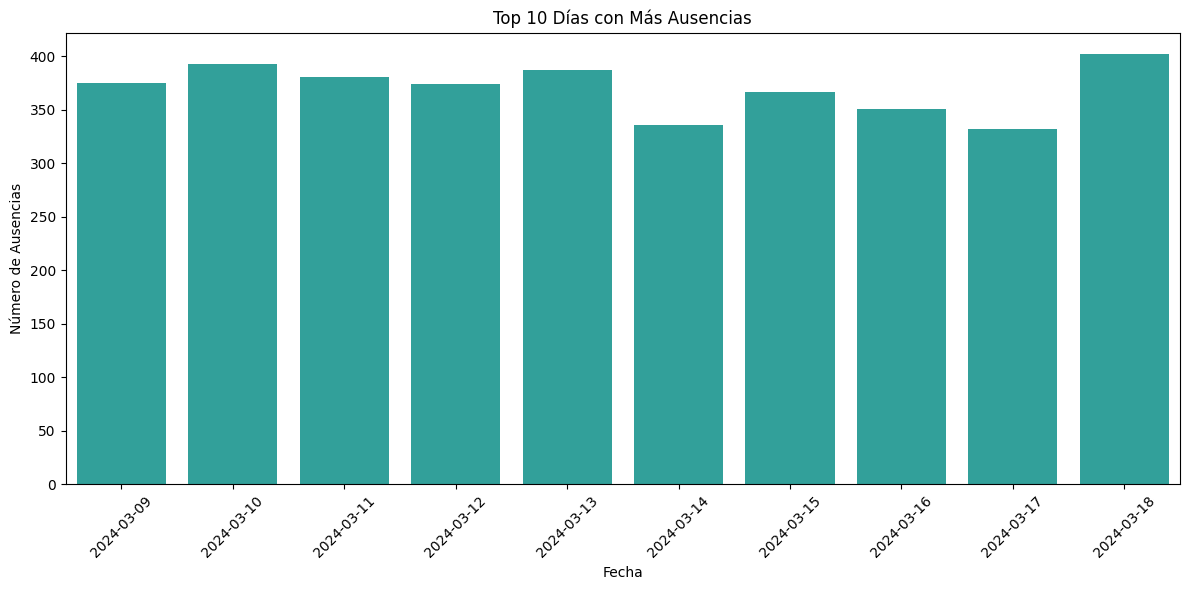

In [64]:
#Ver los días con más número de ausencias.

#Filtrar solo los registros 'absent' o 'excused'. 
df_absent = df_attendance[df_attendance['att_status'].isin(['absent','excused'])]

#Agrupar df_absent por la columna 'att_date' y contar las ausencias
absences_by_date = df_absent.groupby('att_date').size().reset_index(name = 'absence_count')

#Ordenar de mayor a menor para ver en primer lugar los días con más ausencias
# Mostrar solo los top 10 días con más ausencias
top_days = absences_by_date.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_days, x='att_date', y='absence_count', color='lightseagreen')
plt.title('Top 10 Días con Más Ausencias')
plt.xlabel('Fecha')
plt.ylabel('Número de Ausencias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
#Ver el porcentaje del total de registros representa cada tipo de asistencia
#Usamos value_counts(normalize=True) para obtener el porcentaje de cada tipo de asistencia. Hacemos *100 para obtenerlo en porcentaje.
attendance_counts = round(df_attendance['att_status'].value_counts(normalize=True)*100,2)
print(attendance_counts)

att_status
present       25.12
absent        25.02
late          24.96
left early    12.46
excused       12.45
Name: proportion, dtype: float64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\2172403056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_attendance, x='att_status', palette='viridis')


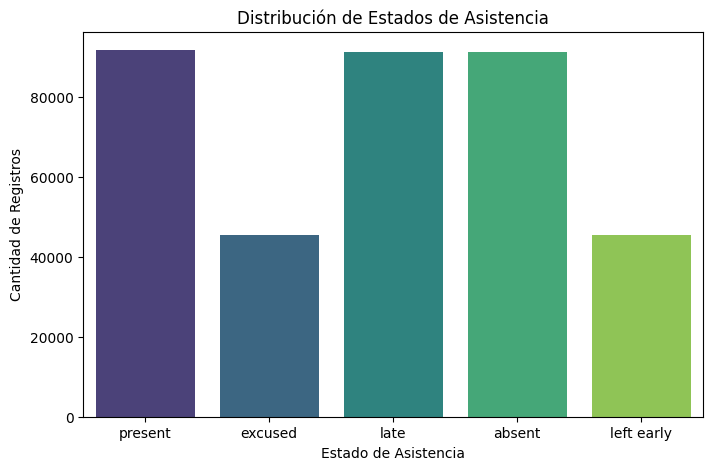

In [66]:
#Ver cuántos estudiantes están en cada categoría de asistencia (present, late, absent, etc.).
plt.figure(figsize=(8,5))
sns.countplot(data=df_attendance, x='att_status', palette='viridis')
plt.title('Distribución de Estados de Asistencia')
plt.xlabel('Estado de Asistencia')
plt.ylabel('Cantidad de Registros')
plt.show()


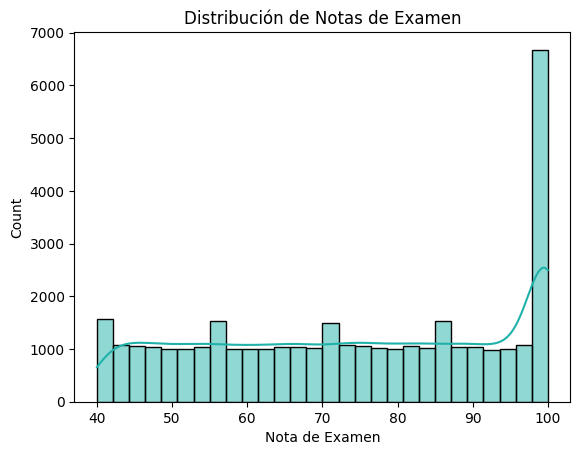

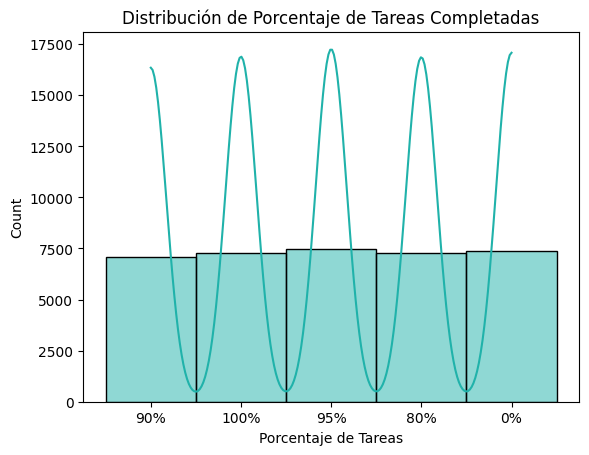

In [67]:
#Datos de notas y rendimiento.

#Hacer un histograma de exam_score con la curva KDE, para visualizar mejor como la distribución de notas.
sns.histplot(df_performance['exam_score'], kde = True, color = 'lightseagreen')
plt.title('Distribución de Notas de Examen')
plt.xlabel('Nota de Examen')
plt.show()

#Hacer un histograma con la realización de tareas 'homework_completion_%'.
sns.histplot(df_performance['homework_completion_%'], kde = True, color = 'lightseagreen')
plt.title('Distribución de Porcentaje de Tareas Completadas')
plt.xlabel('Porcentaje de Tareas')
plt.show()


C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\1427501491.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_scores_by_subject.values, y = avg_scores_by_subject.index, palette = 'viridis')


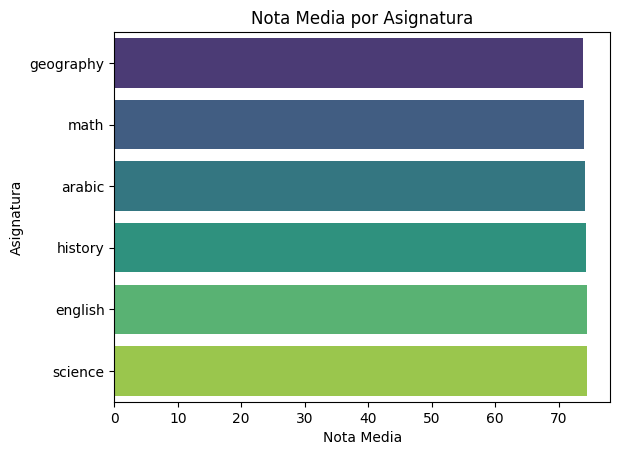

subject
geography    73.847254
math         73.964540
arabic       74.190392
history      74.328993
english      74.394672
science      74.412112
Name: exam_score, dtype: float64


In [68]:
#Asignaturas con mayores o menores notas (promedio)

#Calcular promedio de asinaturas
avg_scores_by_subject = df_performance.groupby('subject')['exam_score'].mean().sort_values()

#Visualización de barras
sns.barplot(x = avg_scores_by_subject.values, y = avg_scores_by_subject.index, palette = 'viridis')
plt.title('Nota Media por Asignatura')
plt.xlabel('Nota Media')
plt.ylabel('Asignatura')
plt.show()

print(avg_scores_by_subject)

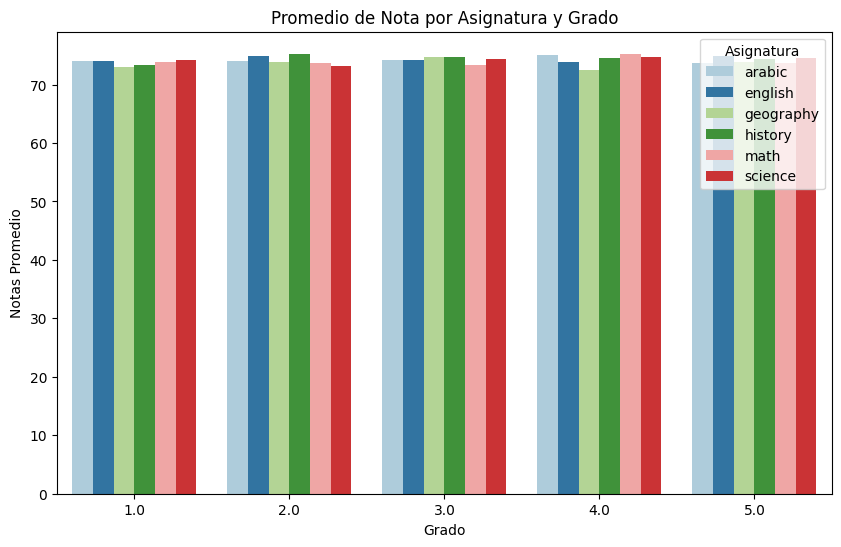

In [69]:
#Promedio de nota por asignatura y grado

#Hacer el merge por columna 'student_id'
df_perf_grade = pd.merge(df_performance, df_students[['student_id','grade_level']], on = 'student_id', how = 'left')

#Calcular el promedio por asignatura y grado agrupando por grado y asignatura
avg_by_subject_grade = df_perf_grade.groupby(['grade_level','subject'])['exam_score'].mean().reset_index()

#Visualizar gráfico
plt.figure(figsize = (10,6))
sns.barplot(data = avg_by_subject_grade, x = 'grade_level', y = 'exam_score', hue = 'subject', palette = 'Paired')
plt.title('Promedio de Nota por Asignatura y Grado')
plt.xlabel('Grado')
plt.ylabel('Notas Promedio')
plt.legend(title = 'Asignatura')
plt.show()

C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\1518128414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_performance, x = 'subject', y = 'exam_score', palette = 'viridis')


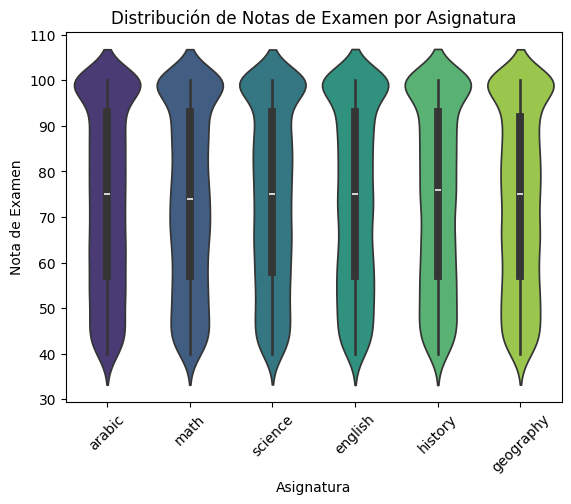

In [70]:
#Ver la distribución de 'exam_score' y 'subject'.
sns.violinplot(data = df_performance, x = 'subject', y = 'exam_score', palette = 'viridis')
plt.title('Distribución de Notas de Examen por Asignatura')
plt.xlabel('Asignatura')
plt.ylabel('Nota de Examen')
plt.xticks(rotation=45)
plt.show()

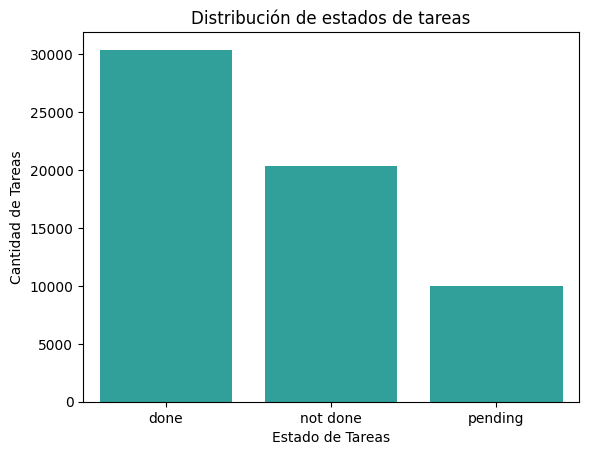

In [71]:
#Datos de Homework.
# Ver cantidad de tareas entregadas por asignatura.
#Filtrar a tarvés de df_homework aquellas tareas con estado 'done' y el nombre de la asignatura
submitted_by_subject = df_homework[df_homework['status'] == 'done']['subject'].value_counts()

sns.countplot(data=df_homework, x='status', order = df_homework['status'].value_counts().index, color = 'lightseagreen')
plt.title('Distribución de estados de tareas')
plt.ylabel('Cantidad de Tareas')
plt.xlabel('Estado de Tareas')
plt.show()


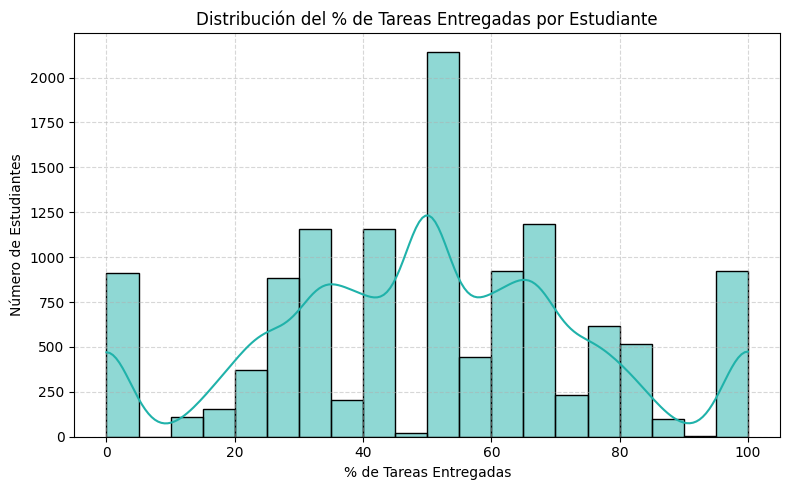

In [72]:
#Calculamos porcentaje de tareas entregadas por estudiantes
hmw_per_stu = df_homework.groupby('student_id')['status'].value_counts().unstack().fillna(0)
hmw_per_stu['porcentaje_entregadas'] = hmw_per_stu['done'] / hmw_per_stu.sum(axis=1) * 100

# Histograma del porcentaje de tareas entregadas
plt.figure(figsize=(8, 5))
sns.histplot(hmw_per_stu['porcentaje_entregadas'], bins=20, color='lightseagreen', kde=True)
plt.title('Distribución del % de Tareas Entregadas por Estudiante')
plt.xlabel('% de Tareas Entregadas')
plt.ylabel('Número de Estudiantes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


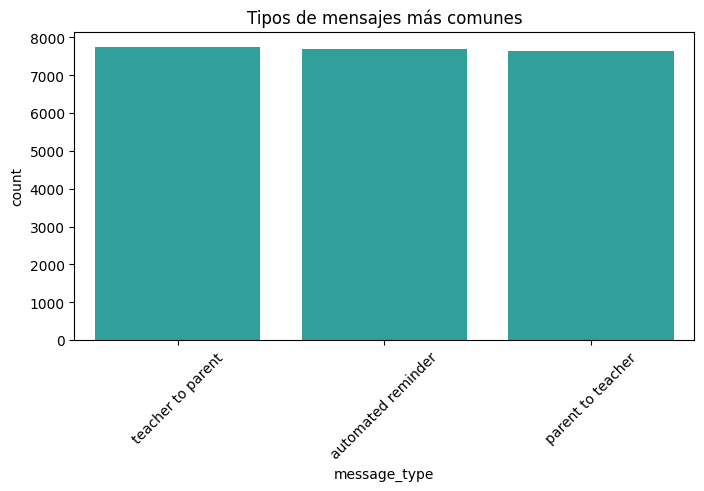

In [73]:
#Comunicacion con padres 
#Tipo de mensajes más comunes de los padres con los profesores
plt.figure(figsize=(8, 4))
sns.countplot(data=df_communication, x='message_type', order=df_communication['message_type'].value_counts().index, color = 'lightseagreen')
plt.title('Tipos de mensajes más comunes')
plt.xticks(rotation=45)
plt.show()

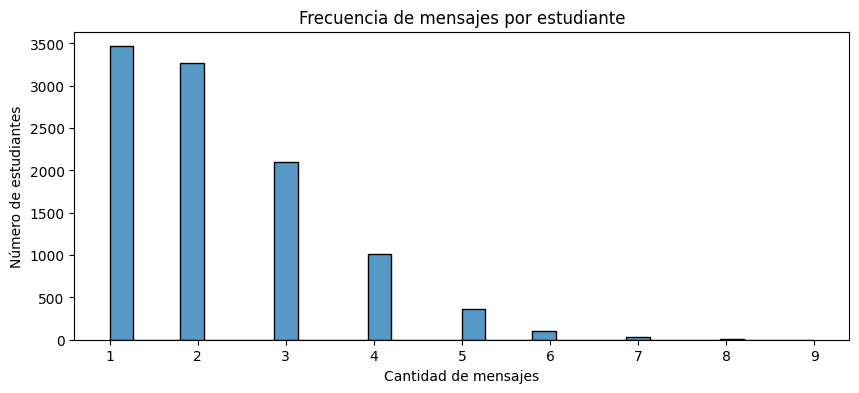

In [74]:
#Frecuencia de mensajes por estudiante
#Seleccionamos el numero de mensajes por numero de estudiantes
msg_per_student = df_communication['student_id'].value_counts()

plt.figure(figsize=(10, 4))
sns.histplot(msg_per_student, bins=30)
plt.title('Frecuencia de mensajes por estudiante')
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Número de estudiantes')
plt.show()

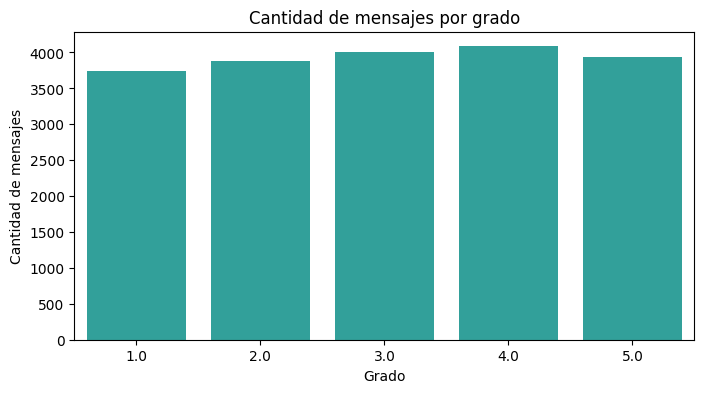

In [75]:
# Comprobar si hay más mensajes en ciertos grados. Para ver si la comunicación entre padres y profesores varía según el grado.
df_comm_grade = pd.merge(df_communication, df_students[['student_id', 'grade_level']], on='student_id', how='left')

plt.figure(figsize=(8, 4))
sns.countplot(data=df_comm_grade, x='grade_level', order=sorted(df_comm_grade['grade_level'].dropna().unique()), color = 'lightseagreen')
plt.title('Cantidad de mensajes por grado')
plt.xlabel('Grado')
plt.ylabel('Cantidad de mensajes')
plt.show()

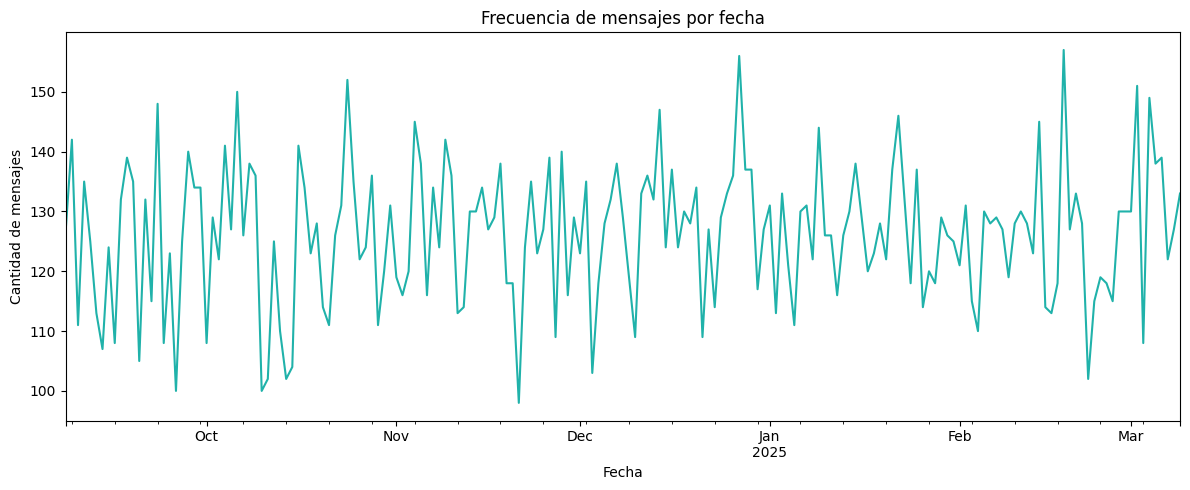

In [76]:
#Comprobar la frecuencia de mensajes por fecha
msgs_by_date = df_communication.groupby('date_message').size()

plt.figure(figsize=(12, 5))
msgs_by_date.plot(color = 'lightseagreen')
plt.title('Frecuencia de mensajes por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de mensajes')
plt.tight_layout()
plt.show()

C:\Users\pooo_\AppData\Local\Temp\ipykernel_17276\2885876916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_students, x='grade_level', palette='viridis')


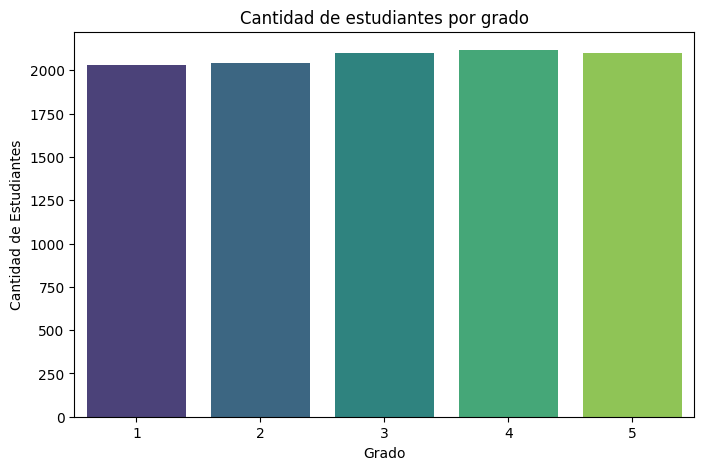

In [77]:
#Datos de estudiantes.df_students. 
#Comprobar la cantidad de estudiantes por grado
plt.figure(figsize=(8,5))
sns.countplot(data=df_students, x='grade_level', palette='viridis')
plt.title('Cantidad de estudiantes por grado')
plt.xlabel('Grado')
plt.ylabel('Cantidad de Estudiantes')
plt.show()

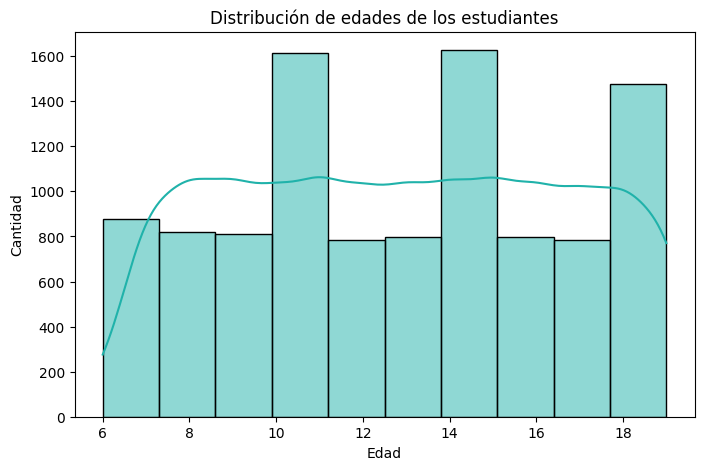

In [78]:
#Comprobar la distribución de los estudiantes por edad 
# Calcular edad (asumiendo análisis en 2025)
hoy = pd.Timestamp('2025-01-01')
df_students['edad'] = df_students['date_of_birth'].apply(lambda x: hoy.year - x.year if pd.notnull(x) else None)

# Histograma de edades
plt.figure(figsize=(8,5))
sns.histplot(df_students['edad'].dropna(), bins=10, kde=True, color='lightseagreen')
plt.title('Distribución de edades de los estudiantes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

In [79]:
#Comprobar si hay esrtudiantes que no tengan un contacto de emergencia.
faltantes = df_students['emergency_contact'].isna().sum()
total = len(df_students)

print(f"Número de estudiantes sin contacto de emergencia: {faltantes}")
print(f"Porcentaje: {faltantes / total:.1%}")

Número de estudiantes sin contacto de emergencia: 0
Porcentaje: 0.0%


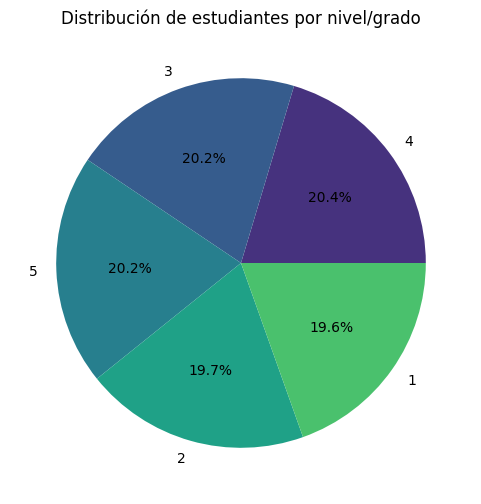

In [80]:
#Ver la distribución de estudiantes por grado
df_students['grade_level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette('viridis'))
plt.title('Distribución de estudiantes por nivel/grado')
plt.ylabel('')
plt.show()

# 4. Guardar archivos limpios

In [81]:
#Guardar los dataframes limpios
# Reiniciamos el índice de cada DataFrame y exportarlo a CSV correctamente para asegurar que los datos se cargan correctamente en PowerBI

# df_students
df_students.reset_index(drop=True, inplace=True)
df_students.to_csv("../data/data_transformed/students_limpio.csv", index=False)

# df_attendance
df_attendance.reset_index(drop=True, inplace=True)
df_attendance.to_csv("../data/data_transformed/attendance_limpio.csv", index=False)

# df_homework
df_homework.reset_index(drop=True, inplace=True)
df_homework.to_csv("../data/data_transformed/homework_limpio.csv", index=False)

# df_communication
df_communication.reset_index(drop=True, inplace=True)
df_communication.to_csv("../data/data_transformed/communication_limpio.csv", index=False)

# df_performance
df_performance.reset_index(drop=True, inplace=True)
df_performance.to_csv("../data/data_transformed/performance_limpio.csv", index=False)
